### Project 1

Project description: 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

### Group No - 13

Team members 
1. Nishad Deosthali
2. Jo Yen

In [1]:
#Loading required libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') #set same style for all plots
pd.options.mode.chained_assignment = None  # suppress chained assignment warning

In [2]:
#Data import
bitcoin_train = pd.read_csv('C:/coursework/AppliedML/dataset/bitcoin_dataset.csv', parse_dates=['Date'], index_col= 0)
bitcoin_test = pd.read_csv('C:/coursework/AppliedML/dataset/test_set.csv', parse_dates = ['Date'], index_col = 0)

In [3]:
bitcoin_train.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344255e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866150e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


### Data preparation
Before model following data preparation steps are completed
1. Removing initial rows with market price = 0, as these have no meaning in overall prediction
2. Log tranformation of market_price
3. Subsetting columns to drop highly correlated variables (based on EDA)
4. Filling NAs with interpolate function
4. Separating/defining train, test and production datasets
3. Data normalization using scaling

#### Data Terminology
Test dataset - Validation dataset created from available training dataset

Production dataset - The february dataset for which we need to predict values

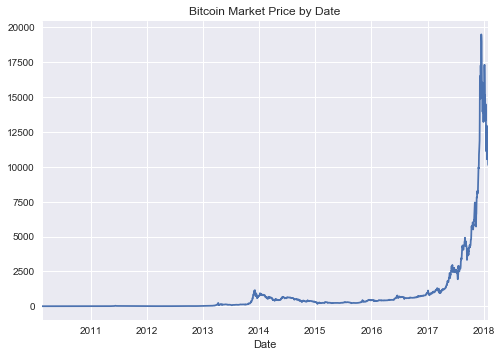

In [4]:
bitcoin_train.btc_market_price.plot()
plt.title('Bitcoin Market Price by Date')
plt.show()

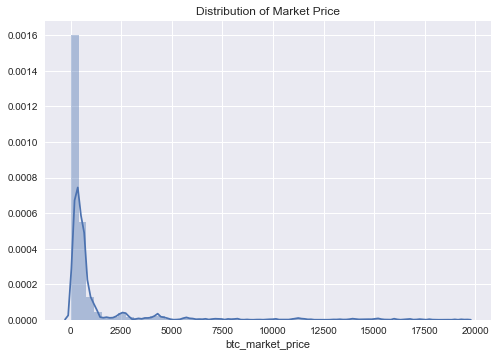

In [5]:
sns.distplot(bitcoin_train['btc_market_price'])
plt.title('Distribution of Market Price')
plt.show()

The Bitcoin Market Price is skewed to the right, indicating log transformations

In [6]:
#Dropping rows with zero values
bitcoin_train = bitcoin_train[bitcoin_train.btc_market_price>0]
#taking log transformation of market price to treat skeweness
bitcoin_train.btc_market_price = np.log(bitcoin_train.btc_market_price)

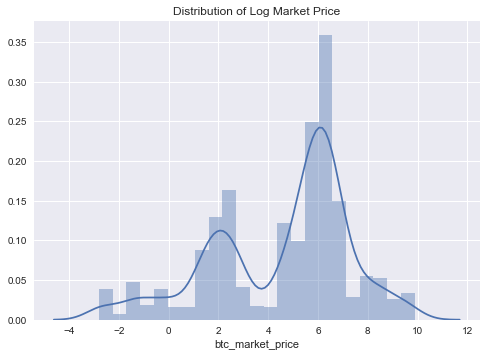

In [7]:
sns.distplot(bitcoin_train['btc_market_price'])
plt.title('Distribution of Log Market Price')
plt.show()

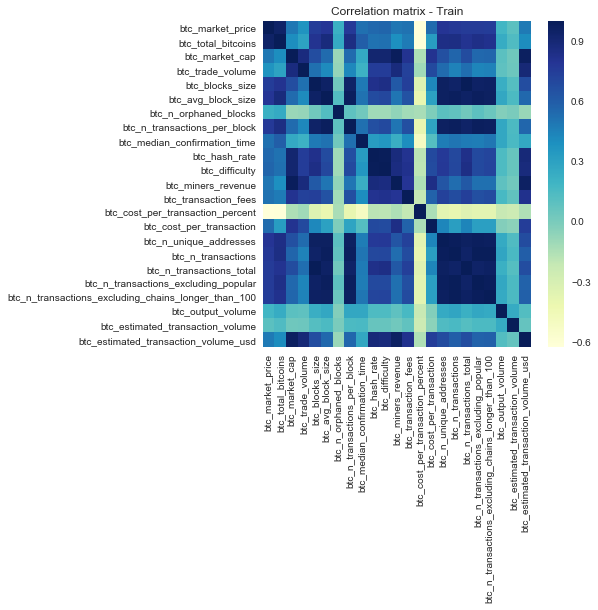

In [8]:
#Correlation Matrix
correlation_mat = bitcoin_train.corr()
plt.figure(figsize= (6,6))
sns.heatmap(correlation_mat, cmap="YlGnBu")
plt.title("Correlation matrix - Train");

According to the correlation matrix, there are groups of variables that tell the same information, therefore their correlation is very high. We have groups of variables concearning the Bitcoin Market, bitcoin blocks, costs and transaction volumes. 

From these blocks we choose only one variable, reducing the number of features for the final analysis  

In [9]:
#Saving values to predict in separate dataset
y = bitcoin_train.btc_market_price.values.ravel()

#Retaining varibales based on correalation matrix from training data set
keep_cols = ['btc_trade_volume', 'btc_avg_block_size','btc_n_orphaned_blocks', 
    'btc_median_confirmation_time', 'btc_hash_rate','btc_transaction_fees',
    'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
    'btc_n_transactions','btc_output_volume', 'btc_estimated_transaction_volume',
    'btc_estimated_transaction_volume_usd']

print('Total {} columns are retained'.format(len(keep_cols)))
bitcoin_train = bitcoin_train[keep_cols]
bitcoin_test = bitcoin_test[keep_cols]

Total 12 columns are retained


We are retaining 12 variables, which are non correlated avoiding colinearity on the regressions

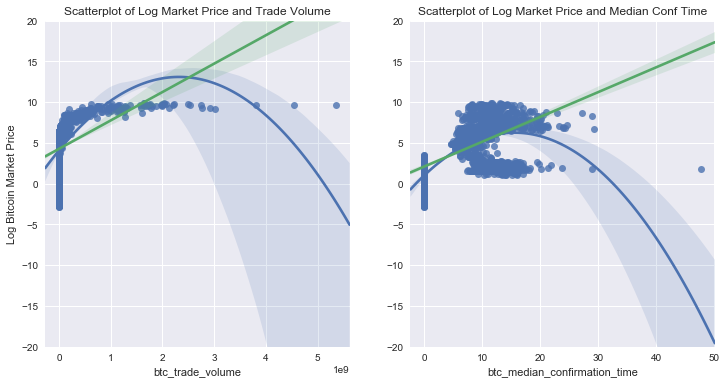

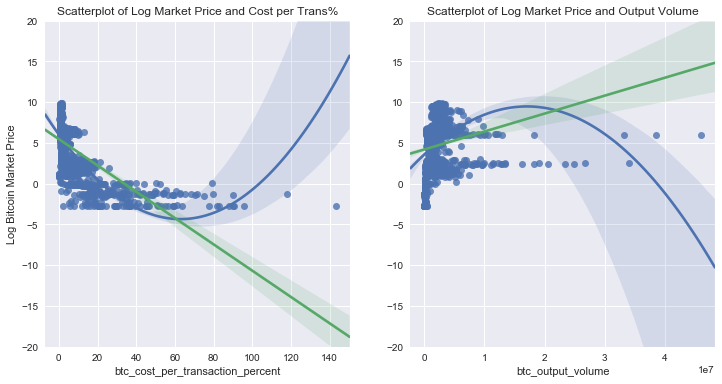

In [10]:
#Assessing linear and polinomial relationship between log market price and features
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(121)
p1 = sns.regplot(x='btc_trade_volume' , y=y, data=bitcoin_train, order = 2, ax=ax1)
p1.set_title('Scatterplot of Log Market Price and Trade Volume')
p1.set_ylabel('Log Bitcoin Market Price')
p1.set_xlabel('Trade Volume')
p1.set_ylim(-20, 20)
p1 = sns.regplot(x='btc_trade_volume' , y=y, data=bitcoin_train, scatter = False, ax=ax1)

ax2 = fig.add_subplot(122)
p2 = sns.regplot(x='btc_median_confirmation_time' , y=y, data=bitcoin_train, order = 2, ax = ax2)
p2.set_title('Scatterplot of Log Market Price and Median Conf Time')
p2.set_xlabel('Median Conf Time')
p2.set_ylim(-20, 20)
p2 = sns.regplot(x='btc_median_confirmation_time' , y=y, data=bitcoin_train, scatter = False, ax = ax2)

fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(121)
p1 = sns.regplot(x='btc_cost_per_transaction_percent' , y=y, data=bitcoin_train, order = 2, ax=ax1)
p1.set_title('Scatterplot of Log Market Price and Cost per Trans%')
p1.set_ylabel('Log Bitcoin Market Price')
p1.set_xlabel('Cost per Trans%')
p1.set_ylim(-20, 20)
p1 = sns.regplot(x='btc_cost_per_transaction_percent' , y=y, data=bitcoin_train, scatter = False, ax=ax1)

ax2 = fig.add_subplot(122)
p2 = sns.regplot(x='btc_output_volume' , y=y, data=bitcoin_train, order = 2, ax = ax2)
p2.set_title('Scatterplot of Log Market Price and Output Volume')
p2.set_xlabel('Output Volume')
p2.set_ylim(-20, 20)
p2 = sns.regplot(x='btc_output_volume' , y=y, data=bitcoin_train, scatter = False, ax = ax2)


We plotted a few of the variables to assess the distributions. From EDA, we see that quadratic relationships will probably have better prediction performances 

In [11]:
#Checking number of missing values
bitcoin_train.isnull().sum()

btc_trade_volume                        21
btc_avg_block_size                       0
btc_n_orphaned_blocks                    0
btc_median_confirmation_time            12
btc_hash_rate                            0
btc_transaction_fees                    10
btc_cost_per_transaction_percent         0
btc_cost_per_transaction                 0
btc_n_transactions                       0
btc_output_volume                        0
btc_estimated_transaction_volume         0
btc_estimated_transaction_volume_usd     0
dtype: int64

In [12]:
# Filling NAs in train dataset with interpolate
bitcoin_train.interpolate(method='linear', inplace=True)
bitcoin_train.isnull().sum()

btc_trade_volume                        0
btc_avg_block_size                      0
btc_n_orphaned_blocks                   0
btc_median_confirmation_time            0
btc_hash_rate                           0
btc_transaction_fees                    0
btc_cost_per_transaction_percent        0
btc_cost_per_transaction                0
btc_n_transactions                      0
btc_output_volume                       0
btc_estimated_transaction_volume        0
btc_estimated_transaction_volume_usd    0
dtype: int64

The interpolate function uses previous and leading values to fill the missing values.

The package of options like 'Linear', 'nearest', 'splice' to create inplace predictions for missing values based on time index

In [13]:
# Production dataset has no null values
bitcoin_test.isnull().sum()

btc_trade_volume                        0
btc_avg_block_size                      0
btc_n_orphaned_blocks                   0
btc_median_confirmation_time            0
btc_hash_rate                           0
btc_transaction_fees                    0
btc_cost_per_transaction_percent        0
btc_cost_per_transaction                0
btc_n_transactions                      0
btc_output_volume                       0
btc_estimated_transaction_volume        0
btc_estimated_transaction_volume_usd    0
dtype: int64

Since there are no na's remaining we will go ahead with data split and tranformations

In [14]:
#Splitting train and test datasets 
X = bitcoin_train
X_prod = bitcoin_test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

print('Shape of train {}, shape of test {}, shape of production {}'.format(X_train.shape, X_test.shape, X_prod.shape))

Shape of train (1907, 12), shape of test (818, 12), shape of production (14, 12)


#### Data Scaling

We selected MinMax scaling for following reason,

We are going to use algorithms like Support Vecor Machines relies on scalar distance between points. So, it is necessary that all the variables are in same range otherwise incorrect weights will be assigned to different columns incorrectly

In [15]:
#Checking results of 2 scalars

from sklearn.preprocessing import MinMaxScaler

#MinMax
MinMax = MinMaxScaler(feature_range= (0,1))
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)
X_prod = MinMax.transform(X_prod)

In [16]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,1907.000000,1907.000000,1907.000000,1907.000000,1.907000e+03,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000,1907.000000
mean,0.016379,0.338153,0.056334,0.168871,6.233341e-02,0.055232,0.038287,0.105633,0.245618,0.048687,0.036717,0.035851
std,0.061943,0.316626,0.123109,0.099245,1.401622e-01,0.100979,0.077504,0.140161,0.232219,0.060797,0.050399,0.098926
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000093,0.071282,0.000000,0.140014,6.813669e-07,0.010167,0.007010,0.033653,0.059079,0.017424,0.018284,0.000340
50%,0.002606,0.208913,0.000000,0.170740,3.837883e-03,0.020921,0.014524,0.055148,0.152009,0.035529,0.031267,0.007903
75%,0.006669,0.644536,0.000000,0.221892,5.998457e-02,0.046552,0.032942,0.112720,0.452794,0.061618,0.044380,0.025041
max,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Modelling and evaluation

Algorithms for modelling
1. Linear Regression
2. Ridge regression with grid search
3. Lasso regression with and without 2nd degree polynomial (with grid search)
4. SVM with Linear, Radial and polynomial kernels (with grid search)
5. Random Forest (with grid search)

Model Evaluation and parameter selection

1. Model scoring
    - We considered Mean Squared Error on test dataset as a measure for choosing best metrics along with difference in test and train MSE to understand avoid overfitting
    
2. Grid Search and cross validation
    - We are using GridSearchCV with 5 fold cross validation and repspective tuning parameters based on algorithm

### Linear Regression

In [17]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
model_results = pd.DataFrame(index=None, columns=['model','train_Rsquare', 'test_Rsquare', 'train_MSE','test_MSE'])

In [18]:
#
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

train_Rsquare = linear_reg.score(X_train, y_train)
test_Rsquare = linear_reg.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, linear_reg.predict(X_train))
test_MSE = mean_squared_error(y_test, linear_reg.predict(X_test))

model_results = model_results.append(pd.Series({'model':'LinrearRegression','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
model_results

,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE
0,LinrearRegression,0.891655,0.894821,0.835524,0.810163


The Linear regression has high R square value of 0.89. The train MSE is actually higher than test MSE.

In [19]:
linear_reg.coef_

array([-0.71441664,  3.34575488,  1.39494549,  2.25136452, -4.11437343,
       -1.48836568, -9.9544127 , 11.639879  ,  4.6446025 , -0.8186243 ,
       -1.8083073 , -5.69901486])

In [20]:
# Ridge regression with tuning alpha

from sklearn.linear_model import Lasso, Ridge


#
param_grid = {'alpha':[0.01, 0.1, 0.5, 1, 10, 50, 100]}

ridge_reg = Ridge()

grid_search = GridSearchCV(ridge_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best parameters for Ridge {}'.format(grid_search.best_params_))

train_Rsquare = grid_search.score(X_train, y_train)
test_Rsquare = grid_search.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, grid_search.predict(X_train))
test_MSE = mean_squared_error(y_test, grid_search.predict(X_test))

model_results = model_results.append(pd.Series({'model':'Ridge','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
model_results

Best parameters for Ridge {'alpha': 0.1}


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE
0,LinrearRegression,0.891655,0.894821,0.835524,0.810163
1,Ridge,0.891629,0.894849,0.835724,0.809946


Ridge regression with tuning alpha did not improve the model. The possible reason is becuase of very small number of important variables and strinkage is not really useful in this case

In [21]:
##Lasso regression with tuning alpha and tolerance

from sklearn.linear_model import Lasso

#
param_grid = {'alpha':[0.01, 0.1, 0.5, 1, 10, 50, 100], 'tol':[0.0001,0.001,0.01,0.1]}

lasso_reg = Lasso()

grid_search = GridSearchCV(lasso_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best parameters for Lasso {}'.format(grid_search.best_params_))

train_Rsquare = grid_search.score(X_train, y_train)
test_Rsquare = grid_search.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, grid_search.predict(X_train))
test_MSE = mean_squared_error(y_test, grid_search.predict(X_test))

model_results = model_results.append(pd.Series({'model':'Lasso','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
model_results


Best parameters for Lasso {'alpha': 0.01, 'tol': 0.01}


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE
0,LinrearRegression,0.891655,0.894821,0.835524,0.810163
1,Ridge,0.891629,0.894849,0.835724,0.809946
2,Lasso,0.875295,0.877676,0.961690,0.942224


The performance of Lasso is worse than Ridge and so for adding polynomila features we will use Ridge regression

Creating polynomial features

In [22]:
# Since Ridge performed better than Lasso, we will add polynimial feats in Ridge
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree =2)
X_train2 = poly2.fit_transform(X_train)
X_test2 = poly2.transform(X_test)

Ridge regression with on polynomial dataset

In [23]:
#Tuning ridge on new dataset
param_grid = {'alpha':[0.01, 0.1, 0.5, 1, 10, 50, 100]}

ridge_reg = Ridge()

grid_search = GridSearchCV(ridge_reg, param_grid, cv=5)
grid_search.fit(X_train2, y_train)

print('Best parameters for Ridge {}'.format(grid_search.best_params_))

train_Rsquare = grid_search.score(X_train2, y_train)
test_Rsquare = grid_search.score(X_test2, y_test)
train_MSE = mean_squared_error(y_train, grid_search.predict(X_train2))
test_MSE = mean_squared_error(y_test, grid_search.predict(X_test2))

model_results = model_results.append(pd.Series({'model':'Poly_2_Ridge','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
model_results

Best parameters for Ridge {'alpha': 0.01}


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE
0,LinrearRegression,0.891655,0.894821,0.835524,0.810163
1,Ridge,0.891629,0.894849,0.835724,0.809946
2,Lasso,0.875295,0.877676,0.961690,0.942224
3,Poly_2_Ridge,0.973636,0.975644,0.203314,0.187608


The polynomial features have added significant value. There is a 10% increase in R square with MSE decreasing to 0.2 from 0.1.

In [24]:
from sklearn.neighbors import KNeighborsRegressor

#Tuning ridge on new dataset
param_grid = {'algorithm':['brute', 'kd_tree'], 'weights':['distance', 'uniform'], 'n_neighbors':[5,10,15,20,50] }

knn_reg = KNeighborsRegressor()

grid_search = GridSearchCV(knn_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best parameters for Ridge {}'.format(grid_search.best_params_))

train_Rsquare = grid_search.score(X_train, y_train)
test_Rsquare = grid_search.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, grid_search.predict(X_train))
test_MSE = mean_squared_error(y_test, grid_search.predict(X_test))

model_results = model_results.append(pd.Series({'model':'Knn','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
model_results

Best parameters for Ridge {'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE
0,LinrearRegression,0.891655,0.894821,0.835524,0.810163
1,Ridge,0.891629,0.894849,0.835724,0.809946
2,Lasso,0.875295,0.877676,0.961690,0.942224
3,Poly_2_Ridge,0.973636,0.975644,0.203314,0.187608
4,Knn,1.000000,0.987820,0.000000,0.093823


#### Even though Knn is giving perfect R square, it is clearly overfitting becasue of the naure of the data and sampling

We have continuous data which is randomly split between test and train. This means we are trying to predict value of say Tueday based on the other values in the week which will be highly correlated.

Hence Knn will be excluded from model selection process

##### SVM
We tested three kernels in SVM - Linear, Radial and Sigmoid

Based on the performance of LineraRegression we expect Radial to perform the best in these set of kernels

In [25]:
# SVM with Linear, Radial and Sigmoid kernel
from sklearn.svm import SVR

##Linear
#Tuning ridge on new dataset
param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100], 'epsilon' :  [0.01, 0.1, 0.5, 1] }

svr_linear = SVR(kernel='linear')

grid_search = GridSearchCV(svr_linear, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best parameters for Linear SVM {}'.format(grid_search.best_params_))

train_Rsquare = grid_search.score(X_train, y_train)
test_Rsquare = grid_search.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, grid_search.predict(X_train))
test_MSE = mean_squared_error(y_test, grid_search.predict(X_test))

model_results = model_results.append(pd.Series({'model':'LinearSVM','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
model_results

Best parameters for Linear SVM {'C': 1, 'epsilon': 0.5}


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE
0,LinrearRegression,0.891655,0.894821,0.835524,0.810163
1,Ridge,0.891629,0.894849,0.835724,0.809946
2,Lasso,0.875295,0.877676,0.961690,0.942224
3,Poly_2_Ridge,0.973636,0.975644,0.203314,0.187608
4,Knn,1.000000,0.987820,0.000000,0.093823
5,LinearSVM,0.886963,0.889107,0.871706,0.854177


In [26]:
# SVM with Linear, Radial and polynomial kernel
from sklearn.svm import SVR

##Radial
#Tuning ridge on new dataset
param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100, 1000], 'gamma':[0.001, 0.01, 0.1, 0.5, 1, 10],'epsilon' :  [0.01, 0.1, 0.5, 1] }

svr_rbf = SVR(kernel='rbf')

grid_search = GridSearchCV(svr_linear, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best parameters for radial kernel SVM {}'.format(grid_search.best_params_))

train_Rsquare = grid_search.score(X_train, y_train)
test_Rsquare = grid_search.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, grid_search.predict(X_train))
test_MSE = mean_squared_error(y_test, grid_search.predict(X_test))

model_results = model_results.append(pd.Series({'model':'SVM_rbf','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
model_results

Best parameters for radial kernel SVM {'C': 1, 'epsilon': 0.5, 'gamma': 0.001}


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE
0,LinrearRegression,0.891655,0.894821,0.835524,0.810163
1,Ridge,0.891629,0.894849,0.835724,0.809946
2,Lasso,0.875295,0.877676,0.961690,0.942224
3,Poly_2_Ridge,0.973636,0.975644,0.203314,0.187608
4,Knn,1.000000,0.987820,0.000000,0.093823
5,LinearSVM,0.886963,0.889107,0.871706,0.854177
6,SVM_rbf,0.886963,0.889107,0.871706,0.854177


In [27]:
# Sigmoid 

#Tuning ridge on new dataset
param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100, 1000], 'gamma':[0.001, 0.01, 0.1, 0.5, 1, 10] , 'epsilon' : [0.01, 0.1, 0.5, 1]}

svr_sig = SVR(kernel='sigmoid', degree = 2)

grid_search = GridSearchCV(svr_sig, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best parameters for 2nd degree polynomial kernel SVM {}'.format(grid_search.best_params_))

train_Rsquare = grid_search.score(X_train, y_train)
test_Rsquare = grid_search.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, grid_search.predict(X_train))
test_MSE = mean_squared_error(y_test, grid_search.predict(X_test))

model_results = model_results.append(pd.Series({'model':'SVR_sigmoid','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
model_results

Best parameters for 2nd degree polynomial kernel SVM {'C': 1000, 'epsilon': 0.5, 'gamma': 0.001}


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE
0,LinrearRegression,0.891655,0.894821,0.835524,0.810163
1,Ridge,0.891629,0.894849,0.835724,0.809946
2,Lasso,0.875295,0.877676,0.961690,0.942224
3,Poly_2_Ridge,0.973636,0.975644,0.203314,0.187608
4,Knn,1.000000,0.987820,0.000000,0.093823
5,LinearSVM,0.886963,0.889107,0.871706,0.854177
6,SVM_rbf,0.886963,0.889107,0.871706,0.854177
7,SVR_sigmoid,0.886962,0.889108,0.871713,0.854168


As expected, Radial Kernel outperformed all other algortihms (exclusing K-nn ofcourse)

In [28]:
from sklearn.tree import DecisionTreeRegressor

#Tuning ridge on new dataset
param_grid = {'max_features':[None,'auto', 'log2'], 'max_depth':[5,10,15,20,50]}

dtc = DecisionTreeRegressor(random_state = 10)

grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best parameters for Decision Trees {}'.format(grid_search.best_params_))

train_Rsquare = grid_search.score(X_train, y_train)
test_Rsquare = grid_search.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, grid_search.predict(X_train))
test_MSE = mean_squared_error(y_test, grid_search.predict(X_test))

model_results = model_results.append(pd.Series({'model':'Decision_Tree','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
model_results

Best parameters for Decision Trees {'max_depth': 10, 'max_features': None}


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE
0,LinrearRegression,0.891655,0.894821,0.835524,0.810163
1,Ridge,0.891629,0.894849,0.835724,0.809946
2,Lasso,0.875295,0.877676,0.961690,0.942224
3,Poly_2_Ridge,0.973636,0.975644,0.203314,0.187608
4,Knn,1.000000,0.987820,0.000000,0.093823
5,LinearSVM,0.886963,0.889107,0.871706,0.854177
6,SVM_rbf,0.886963,0.889107,0.871706,0.854177
7,SVR_sigmoid,0.886962,0.889108,0.871713,0.854168
8,Decision_Tree,0.999667,0.995525,0.002566,0.034473


In [29]:
from sklearn.ensemble import RandomForestRegressor


#Tuning ridge on new dataset
param_grid = {'max_features':['auto', 'log2'], 'max_depth':[5,10,15,20,50]}

rf_reg = RandomForestRegressor(n_estimators= 500, n_jobs = -1, random_state = 10)

grid_search = GridSearchCV(rf_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best parameters for Random Forest {}'.format(grid_search.best_params_))

train_Rsquare = grid_search.score(X_train, y_train)
test_Rsquare = grid_search.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, grid_search.predict(X_train))
test_MSE = mean_squared_error(y_test, grid_search.predict(X_test))

model_results = model_results.append(pd.Series({'model':'Random_Forest','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
model_results

Best parameters for Random Forest {'max_depth': 50, 'max_features': 'log2'}


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE
0,LinrearRegression,0.891655,0.894821,0.835524,0.810163
1,Ridge,0.891629,0.894849,0.835724,0.809946
2,Lasso,0.875295,0.877676,0.961690,0.942224
3,Poly_2_Ridge,0.973636,0.975644,0.203314,0.187608
4,Knn,1.000000,0.987820,0.000000,0.093823
5,LinearSVM,0.886963,0.889107,0.871706,0.854177
6,SVM_rbf,0.886963,0.889107,0.871706,0.854177
7,SVR_sigmoid,0.886962,0.889108,0.871713,0.854168
8,Decision_Tree,0.999667,0.995525,0.002566,0.034473
9,Random_Forest,0.999735,0.998105,0.002042,0.014598


In [30]:
# Adaboost

from sklearn.ensemble import AdaBoostRegressor


#Tuning ridge on new dataset
param_grid = {'learning_rate':[0.01, 0.1, 0.5,1], 'loss':['linear','square','exponential']}

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators= 500)

grid_search = GridSearchCV(ada_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best parameters for AdaBooster with Decision Tree base {}'.format(grid_search.best_params_))

train_Rsquare = grid_search.score(X_train, y_train)
test_Rsquare = grid_search.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, grid_search.predict(X_train))
test_MSE = mean_squared_error(y_test, grid_search.predict(X_test))

model_results = model_results.append(pd.Series({'model':'AdaBoost','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
model_results

Best parameters for AdaBooster with Decision Tree base {'learning_rate': 1, 'loss': 'linear'}


,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE
0,LinrearRegression,0.891655,0.894821,0.835524,0.810163
1,Ridge,0.891629,0.894849,0.835724,0.809946
2,Lasso,0.875295,0.877676,0.961690,0.942224
3,Poly_2_Ridge,0.973636,0.975644,0.203314,0.187608
4,Knn,1.000000,0.987820,0.000000,0.093823
5,LinearSVM,0.886963,0.889107,0.871706,0.854177
6,SVM_rbf,0.886963,0.889107,0.871706,0.854177
7,SVR_sigmoid,0.886962,0.889108,0.871713,0.854168
8,Decision_Tree,0.999667,0.995525,0.002566,0.034473
9,Random_Forest,0.999735,0.998105,0.002042,0.014598


### Learning curves

Text(0.5,1,'Train and Test MSE for each model')

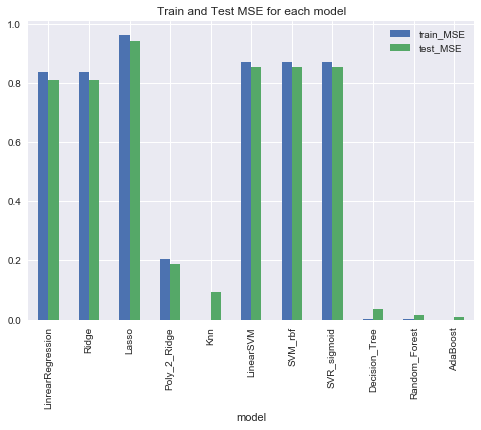

In [31]:
cols = ['model','train_MSE','test_MSE']
model_results[cols].set_index('model').plot(kind = 'bar');
plt.title('Train and Test MSE for each model')
#

Text(0.5,1,'Model R square for each model')

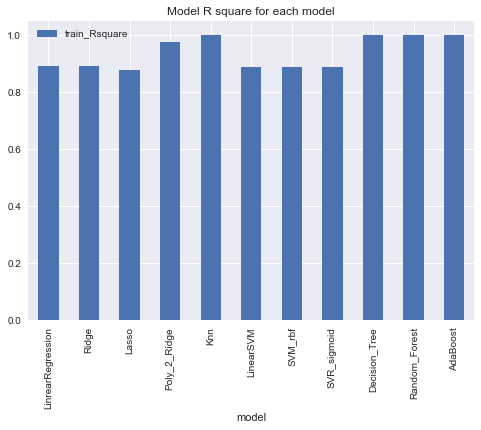

In [32]:
cols = ['model','train_Rsquare']
model_results[cols].set_index('model').plot(kind = 'bar');
plt.title('Model R square for each model')
#

#### Model results
1. The improved performance in Lasso when adding polynomial regression indicates the non-linear nature of the prediction boundries
2. Ensemble models outperformed Linear and SVM models in general with nearly 10% higher R square
3. AdaBoost with Decision Trees and Random Forest are perfomrning best with 99.8% R square and ~0.02 mean squared error.
4. Knn is overfitting because of sampling scheme and we decided to ignore the results

#### Evidence of possible overfitting
 - If we obeserve the best parameters of algorithsm like Random Forest - max_depth = 50, indicates the best results are developed with overgrown trees and with the train-test split method the models might perform significantly different based on samples
 - Testing this with cross validation on complete datasets


#### Cross validation on Adboost and Random Forest with best parameters from GridSearchCV

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
# Training on complete dataset and calculating 5-fold cross validation

adBoost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), learning_rate =0.1, loss = 'linear', n_estimators= 500)
ada_scores = cross_val_score(adBoost, X, y, cv=5, scoring= 'neg_mean_squared_error')
ada_scores

array([-4.36590008, -2.16417017, -0.90120976, -0.06455436, -1.9842097 ])

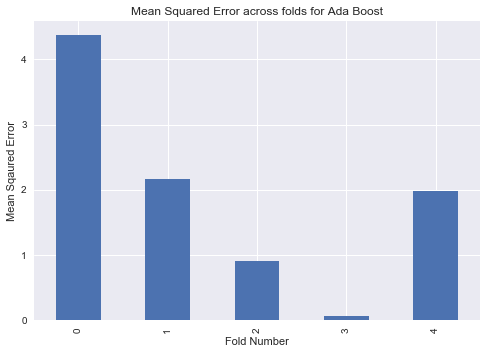

In [35]:
pd.Series(np.abs(ada_scores)).plot(kind='bar')
plt.title('Mean Squared Error across folds for Ada Boost')
plt.xlabel('Fold Number')
plt.ylabel('Mean Sqaured Error');

In [36]:
# Training on complete dataset and calculating 5-fold cross validation

rf_reg = RandomForestRegressor(max_depth =50, max_features = 'auto', n_jobs=-1, n_estimators= 500)
rf_scores = cross_val_score(rf_reg, X, y, cv=5, scoring= 'neg_mean_squared_error')
rf_scores

array([-4.37691893, -0.83095722, -1.0442799 , -0.04263804, -2.28693489])

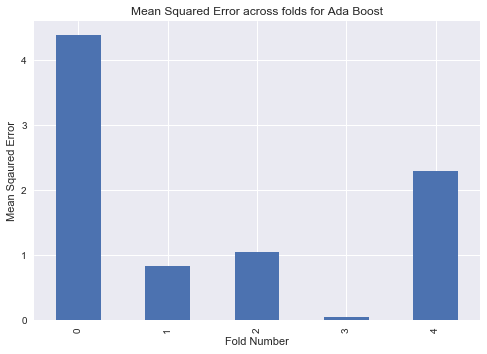

In [37]:
pd.Series(np.abs(rf_scores)).plot(kind='bar')
plt.title('Mean Squared Error across folds for Ada Boost')
plt.xlabel('Fold Number')
plt.ylabel('Mean Sqaured Error');

There is a significant variation in performance across folds, which shows the overfitting issue is not completely solved even with best paramters.

#### We will use Random Forest as a final model as it has little more stable performance than Ada boost. But use lower max_depth in order to avoid overfitting

In [38]:
#Predictions on prduction data set

ref_final =  RandomForestRegressor(max_depth =10,max_features = 'auto', n_jobs=-1, n_estimators= 500)
ref_final.fit(X, y)

predicted_feb = ref_final.predict(X_prod)
#redicted_feb = np.exp(predicted_feb)

In [39]:
predicted_feb

array([0.99559649, 0.99527844, 0.99444664, 0.99444664, 0.99559649,
       0.99559649, 0.99444664, 0.97933354, 0.99467171, 0.99444664,
       0.99444664, 0.99444664, 0.99444664, 0.99444664])

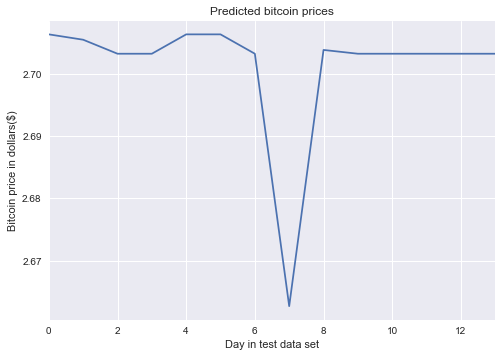

In [43]:
#Plotting final predicted values
pd.Series(np.exp(predicted_feb)).plot()
plt.xlabel('Day in test data set')
plt.ylabel('Bitcoin price in dollars($)')
plt.title('Predicted bitcoin prices');

#### The actual price of bitcoin is in thousand dollars while the best model is predicting price to be $3

This is becasue of the prices are dependent on time and there is a singificant price increase since August 2017.

The possible problem can be seen with model specific cross-validation where the test MSE is as high as 6 (in log transformation) but the average is as low as 0.8.

The problem should be treated as time-series rather than plain regression.